In [ ]:
param = {'r_ver': 0.3,'r_wall':0.1,'r_terminal':0.05,'r_gen':0.05}

HOOMD-blue 2.6.0 DOUBLE HPMC_MIXED TBB SSE SSE2 SSE3 
Compiled: 05/29/2019
Copyright (c) 2009-2019 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, C D Lorenz, and A Travesset. "General purpose molecular dynamics
  simulations fully implemented on graphics processing units", Journal of
  Computational Physics 227 (2008) 5342--5359
* J Glaser, T D Nguyen, J A Anderson, P Liu, F Spiga, J A Millan, D C Morse, and
  S C Glotzer. "Strong scaling of general-purpose molecular dynamics simulations
  on GPUs", Computer Physics Communications 192 (2015) 97--107
-----
HOOMD-blue is running on the CPU
snap.particles.types ['P']
pstart 421
pend 432
pstart 2 433
radius of capsid :  1.097883498376461
radius of capsid :  1.097896311585853
radius of capsid :  1.097887213504755
radius of capsid :  1.0978962829302354
radius of capsid :  1.0978788172788272
radius of capsid :  1.097878777969222
radius of capsid :  1.097883496684285
radius

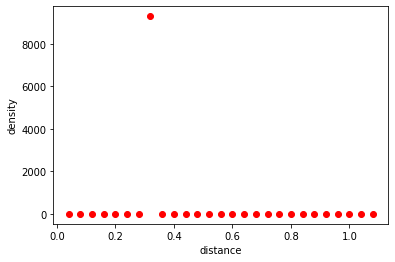

notice(2): integrate.langevin/bd is using specified gamma values
notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 1463
notice(2): Particles with 1 exclusions             : 14
notice(2): Particles with 2 exclusions             : 419
notice(2): Particles with 6 exclusions             : 12
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: yes
** starting run **
Time 00:00:05 | Step 5000 / 5000 | TPS 973.082 | ETA 00:00:00
Average TPS: 972.936
---------
-- Neighborlist stats:
0 normal updates / 50 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 1476 / n_neigh_avg: 37.7862
shortest rebuild period: 100
-- Cell list stats:
Dimension: 4, 4, 4
n_min    : 0 / n_max: 254 / n_avg: 29.8125
** run complete **
number of polymer inside the capsid 421 
** starting run **
Time 00:00:10 | Step 10000 / 10000 | TPS 983.697 | ETA 00:00:00
Average TPS: 983.533
---------
-- Ne

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/mohammadaminsafdari/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-2e1b6c6a4dc9>", line 639, in <module>
    hoomd.run(10000)
  File "/Users/mohammadaminsafdari/opt/anaconda3/lib/python3.7/site-packages/hoomd/__init__.py", line 201, in run
    context.current.system.run(int(tsteps), callback_period, callback, limit_hours, int(limit_multiple));
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/mohammadaminsafdari/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recen

KeyboardInterrupt: 

In [1]:
param = {'r_ver': 0.3,'r_wall':0.1,'r_terminal':0.05,'r_gen':0.05}
from hoomd import md
from cprint import cprint
import pandas as pd
import hoomd
import itertools
import numpy
import matplotlib.pyplot as plt
import math
import gsd.hoomd
import matplotlib.cm
from matplotlib.colors import Normalize
import numpy as np
from random import seed
from random import random
from hoomd import _hoomd
from hoomd.md import _md
from hoomd.md import force


input_file_genome = 'trajectoryN421D05.gsd'
vertex_file_namge = '1_1vertexs.csv'
# def create_shell(param):

end_terminal_length = 1


def count_inside(snap):
    size_p = len(index_p)
    size_v = len(index_c)
    max_r = 0
    dis_1 = 0
    centeral_mass = [0,0,0]
    count_p = 0
    
    for i in range(size_v):
        centeral_mass[0] += snap.particles.position[index_c[i]][0]
        centeral_mass[1] += snap.particles.position[index_c[i]][1]
        centeral_mass[2] += snap.particles.position[index_c[i]][2]
        
    centeral_mass[0] = centeral_mass[0] / size_v
    centeral_mass[1] = centeral_mass[1] / size_v
    centeral_mass[2] = centeral_mass[2] / size_v

    for i in range(size_v):
        dis_1 = distance(centeral_mass[0],centeral_mass[1],centeral_mass[2],snap.particles.position[index_c[i]][0]
                 ,snap.particles.position[index_c[i]][1],snap.particles.position[index_c[i]][2])
        if (dis_1 > max_r):
            max_r = dis_1
            
    for j in range(size_p):
        dis_1 = distance(centeral_mass[0],centeral_mass[1],centeral_mass[2],snap.particles.position[index_p[j]][0]
             ,snap.particles.position[index_p[j]][1],snap.particles.position[index_p[j]][2])
        if (dis_1 < max_r ):
            count_p +=1 
    CGer = '\033[32m'
    CEND = '\033[0m'
    print(CGer+'number of polymer inside the capsid',count_p,CEND)

def density_fun(snap):
    size_p = len(index_p)
    size_v = len(index_c)
    delta_r = 0.04
    max_r = 0
    dis_1 = 0
    step = 0
    centeral_mass = [0,0,0]
    
    for i in range(size_v):
        centeral_mass[0] += snap.particles.position[index_c[i]][0]
        centeral_mass[1] += snap.particles.position[index_c[i]][1]
        centeral_mass[2] += snap.particles.position[index_c[i]][2]
        
    centeral_mass[0] = centeral_mass[0] / size_v
    centeral_mass[1] = centeral_mass[1] / size_v
    centeral_mass[2] = centeral_mass[2] / size_v

    for i in range(size_v):
        dis_1 = distance(centeral_mass[0],centeral_mass[1],centeral_mass[2],snap.particles.position[index_c[i]][0]
                 ,snap.particles.position[index_c[i]][1],snap.particles.position[index_c[i]][2])
        if (dis_1 > max_r):
            max_r = dis_1
    step = math.floor((max_r)/delta_r)
    density = np.zeros(step)
    rad = np.zeros(step)
    for i in range(step):
        for j in range(size_p):
            dis_1 = distance(centeral_mass[0],centeral_mass[1],centeral_mass[2],snap.particles.position[index_p[j]][0]
                 ,snap.particles.position[index_p[j]][1],snap.particles.position[index_p[j]][2])
            if (dis_1 > i *delta_r and dis_1<= (i+1)*delta_r):
                density[i] +=1
        rad[i] = (i+1)* delta_r
        density[i] = 3*density[i]/(4*math.pi*(math.pow((i+1)* delta_r,3)-math.pow(i* delta_r,3)))
           
    print('radius array :',len(rad))
    print('density array :',len(density))
    plt.plot(rad,density,'ro')
    plt.xlabel('distance')
    plt.ylabel('density')
    plt.show()

def distance(x1,y1,z1,x2,y2,z2):
    return math.sqrt((x2-x1)**2+(y2-y1)**2+(z2-z1)**2)

def distance_matrix(snap):
    
    f = open("distance.txt","a")

    size = len(snap.particles.position)
    
    for i in range(size):
        for j in range(size):
            if (i!=j):
                x1 = snap.particles.position[i][0]
                y1 = snap.particles.position[i][1]
                z1 = snap.particles.position[i][2]
                x2 = snap.particles.position[j][0]
                y2 = snap.particles.position[j][1]
                z2 = snap.particles.position[j][2]
                f.write(str(distance(x1,y1,z1,x2,y2,z2))+"\t")
            else:
                f.write("NaN \t")
        f.write("\n")
    f.close()
    
def radius_gyration(snap):
    
    size = len(snap.particles.position)
    
    x_cm = 0
    y_cm = 0
    z_cm = 0
    
    for i in range(size):
        x_cm = x_cm + snap.particles.position[i][0]
        y_cm = y_cm + snap.particles.position[i][1]
        z_cm = z_cm + snap.particles.position[i][2]
        
    x_cm = x_cm / size
    y_cm = y_cm / size
    z_cm = z_cm / size
    
    g = 0
    for i in range(size):
        g = g + (snap.particles.position[i][0] - x_cm) ** 2
        g = g + (snap.particles.position[i][1] - y_cm) ** 2
        g = g + (snap.particles.position[i][2] - z_cm) ** 2
    
    g = g /size
    return g
    print("radius of gyration = ",g)

def end_to_end_length(snap):
    
    size = len(snap.particles.position)
    
    x1 = snap.particles.position[0][0]
    y1 = snap.particles.position[0][1]
    z1 = snap.particles.position[0][2]
    x2 = snap.particles.position[size-1][0]
    y2 = snap.particles.position[size-1][1]
    z2 = snap.particles.position[size-1][2]
    return(distance(x1,y1,z1,x2,y2,z2))
    print("end to end length = ",distance(x1,y1,z1,x2,y2,z2))

def update_wall_position(snap):
    triangle = pd.read_csv ('1_triangle.csv')
    vertex = pd.read_csv (vertex_file_namge)
    
    p1x = 0
    p1y = 0
    p1z = 0
    p2x = 0
    p2y = 0
    p2z = 0
    
    vx1 = vy1 = vz1 = vx2 = vy2 = vz2 = vx3 = vy3 = vz3 = 0 
    
    wall_x = 0
    wall_y = 0
    wall_z = 0
    wall_number = 0
    max_wall_number = len(index_w)

    diameter_of_m = param['r_wall']
    wall_vertex = pd.DataFrame(columns=['x','y','z','t'])
    
    for i in range(len(triangle)-1):
        vx1 = snap.particles.position[index_c[triangle.tv1[i]-1]][0]
        vy1 = snap.particles.position[index_c[triangle.tv1[i]-1]][1]
        vz1 = snap.particles.position[index_c[triangle.tv1[i]-1]][2]
        vx2 = snap.particles.position[index_c[triangle.tv2[i]-1]][0]
        vy2 = snap.particles.position[index_c[triangle.tv2[i]-1]][1]
        vz2 = snap.particles.position[index_c[triangle.tv2[i]-1]][2]

        number1 = distance(vertex.x[triangle.tv1[i]-1],vertex.y[triangle.tv1[i]-1],vertex.z[triangle.tv1[i]-1],
                          vertex.x[triangle.tv3[i]-1],vertex.y[triangle.tv3[i]-1],vertex.z[triangle.tv3[i]-1])/diameter_of_m
        
        for j in range(int(number1)):
            
            p1x = vertex.x[triangle.tv1[i]-1] + ( j / int(number1) ) * ( vertex.x[triangle.tv3[i]-1] - vertex.x[triangle.tv1[i]-1])
            p1y = vertex.y[triangle.tv1[i]-1] + ( j / int(number1) ) * ( vertex.y[triangle.tv3[i]-1] - vertex.y[triangle.tv1[i]-1])
            p1z = vertex.z[triangle.tv1[i]-1] + ( j / int(number1) ) * ( vertex.z[triangle.tv3[i]-1] - vertex.z[triangle.tv1[i]-1])

            p2x = vertex.x[triangle.tv2[i]-1] + ( j / int(number1) ) * ( vertex.x[triangle.tv3[i]-1] - vertex.x[triangle.tv2[i]-1])
            p2y = vertex.y[triangle.tv2[i]-1] + ( j / int(number1) ) * ( vertex.y[triangle.tv3[i]-1] - vertex.y[triangle.tv2[i]-1])
            p2z = vertex.z[triangle.tv2[i]-1] + ( j / int(number1) ) * ( vertex.z[triangle.tv3[i]-1] - vertex.z[triangle.tv2[i]-1])

            number2 = distance(p1x,p1y,p1z,p2x,p2y,p2z) / diameter_of_m
    
            vx1 = snap.particles.position[index_c[triangle.tv1[i]-1]][0]
            vy1 = snap.particles.position[index_c[triangle.tv1[i]-1]][1]
            vz1 = snap.particles.position[index_c[triangle.tv1[i]-1]][2]

            vx2 = snap.particles.position[index_c[triangle.tv2[i]-1]][0]
            vy2 = snap.particles.position[index_c[triangle.tv2[i]-1]][1]
            vz2 = snap.particles.position[index_c[triangle.tv2[i]-1]][2]
            
            vx3 = snap.particles.position[index_c[triangle.tv3[i]-1]][0]
            vy3 = snap.particles.position[index_c[triangle.tv3[i]-1]][1]
            vz3 = snap.particles.position[index_c[triangle.tv3[i]-1]][2]
            
            p1x = vx1 + ( j / int(number1) ) * (vx3 - vx1)
            p1y = vy1 + ( j / int(number1) ) * (vy3 - vy1)
            p1z = vz1 + ( j / int(number1) ) * (vz3 - vz1)
            p2x = vx2 + ( j / int(number1) ) * (vx3 - vx2)
            p2y = vy2 + ( j / int(number1) ) * (vy3 - vy2)
            p2z = vz2 + ( j / int(number1) ) * (vz3 - vz2)
            
            for k in range(int(number2)+1):
                wall_x = p1x + (k/int(number2)) * (p2x - p1x)
                wall_y = p1y + (k/int(number2)) * (p2y - p1y)
                wall_z = p1z + (k/int(number2)) * (p2z - p1z)
                
                snap.particles.position[index_w[wall_number]][0] = wall_x
                snap.particles.position[index_w[wall_number]][1] = wall_y
                snap.particles.position[index_w[wall_number]][2] = wall_z 
                
                wall_number = wall_number + 1
    return snap

def move_to_origin(snap):
    size = len(snap.particles.position)
    
    x_cm = 0
    y_cm = 0
    z_cm = 0
    
    for i in range(size):
        x_cm = x_cm + snap.particles.position[i][0]
        y_cm = y_cm + snap.particles.position[i][1]
        z_cm = z_cm + snap.particles.position[i][2]
        
    x_cm = x_cm / size
    y_cm = y_cm / size
    z_cm = z_cm / size
    
    for i in range(size):
        snap.particles.position[i][0] = snap.particles.position[i][0] - x_cm 
        snap.particles.position[i][1] = snap.particles.position[i][1] - y_cm 
        snap.particles.position[i][2] = snap.particles.position[i][2] - z_cm
        
def create_shell():
   
    vertex = pd.read_csv (vertex_file_namge)
    line = pd.read_csv ('1_lines.csv')
    triangle = pd.read_csv ('1_triangle.csv')
    wall_vertex = pd.DataFrame(columns=['x','y','z','t'])
    
    p1x = 0
    p1y = 0
    p1z = 0
    p2x = 0
    p2y = 0
    p2z = 0
    wall_x = 0
    wall_y = 0
    wall_z = 0
    number1 = 0
    number2 = 0
    centeral_mass = [0,0,0]
    
    for i in range(len(vertex)):
        centeral_mass[0] += vertex.x[i]
        centeral_mass[1] += vertex.y[i]
        centeral_mass[2] += vertex.z[i]
        
    centeral_mass[0] = centeral_mass[0] / len(vertex)
    centeral_mass[1] = centeral_mass[1] / len(vertex)
    centeral_mass[2] = centeral_mass[2] / len(vertex)
    
    diameter_of_m = param['r_wall']
    wall_vertex = pd.DataFrame(columns=['x','y','z','t'])
    for i in range(len(triangle)-1):
        number1 = distance(vertex.x[triangle.tv1[i]-1],vertex.y[triangle.tv1[i]-1],vertex.z[triangle.tv1[i]-1],
                          vertex.x[triangle.tv3[i]-1],vertex.y[triangle.tv3[i]-1],vertex.z[triangle.tv3[i]-1])/diameter_of_m
        
        for j in range(int(number1)):
            
            p1x = vertex.x[triangle.tv1[i]-1] + ( j / int(number1) ) * ( vertex.x[triangle.tv3[i]-1] - vertex.x[triangle.tv1[i]-1])
            p1y = vertex.y[triangle.tv1[i]-1] + ( j / int(number1) ) * ( vertex.y[triangle.tv3[i]-1] - vertex.y[triangle.tv1[i]-1])
            p1z = vertex.z[triangle.tv1[i]-1] + ( j / int(number1) ) * ( vertex.z[triangle.tv3[i]-1] - vertex.z[triangle.tv1[i]-1])

            p2x = vertex.x[triangle.tv2[i]-1] + ( j / int(number1) ) * ( vertex.x[triangle.tv3[i]-1] - vertex.x[triangle.tv2[i]-1])
            p2y = vertex.y[triangle.tv2[i]-1] + ( j / int(number1) ) * ( vertex.y[triangle.tv3[i]-1] - vertex.y[triangle.tv2[i]-1])
            p2z = vertex.z[triangle.tv2[i]-1] + ( j / int(number1) ) * ( vertex.z[triangle.tv3[i]-1] - vertex.z[triangle.tv2[i]-1])

            number2 = distance(p1x,p1y,p1z,p2x,p2y,p2z) / diameter_of_m

            for k in range(int(number2)+1):
                wall_x = p1x + (k / int(number2)) * (p2x - p1x)
                wall_y = p1y + (k / int(number2)) * (p2y - p1y)
                wall_z = p1z + (k / int(number2)) * (p2z - p1z)
                wall_vertex.loc[len(wall_vertex.index)] = [wall_x,wall_y,wall_z,i]
    return shell(vertex,line,triangle,wall_vertex,centeral_mass)
class shell():
    """docstring for Shell"""
#     def __init__(self,param,vertex,line,triangle):
    def __init__(self,vertex,line,triangle,wall_vertex,centeral_mass):
        # super(polymer, self).__init__()
        
        self.rp = param['r_ver'] #param['Rx']
        self.R = 1.1 #param['R']
        
        self.l0 = 1.0 #param['l0']
        self.theta = 0.644#param['theta0']
        self.theta_upper = 40.0#param['theta_upper']
        self.theta_lower = 15.0#param['theta_lower']
        self.gamma = 120 #param['gamma']
        self.sigma = 0.0001 #param['sigma']
        self.seed = [1] #param['s_seed']
        self.typeid = [1] #param['s_typeid']
        self.bodyid = [-1,-2,-3] #param['s_bodyid']
        self.bondid = [1,2] #param['s_bondid']
        self.dihedralid = [0] #param['s_dihedralid']
        self.vertex = vertex
        self.centeral_mass = centeral_mass
        self.wall_vertex = wall_vertex
        self.line = line
        self.triangle = triangle
        self.n = len(self.vertex)
        self.n_wall = len(self.wall_vertex)
        self.particles = self.vertex[list('xyz')].values
        self.pids = [1]*self.n
        self.particles_wall = self.wall_vertex[list('xyz')].values
        self.pids_wall = [2] * self.n_wall
#         print('self.pids_wall',self.pids_wall)
        self.pids_spik = [3] * (self.n * end_terminal_length)
#         print('self.pids_spik',self.pids_spik)
        self.bonds = np.int_(self.line[['lv1','lv2']])
        self.bonds_spik = self.n * end_terminal_length
        self.dihedrals=[]
        
    def shellprint(self):
        cprint('Shell Structure:\n','yellow')
        print(self.vertex)
        print(self.line)
        print(self.triangle)
        
    def update_shell_info(self):
        self.n=len(self.vertex)
        self.update_pids()
        self.particles=np.array(self.vertex[list('xyz')])
        self.bonds=np.int_(self.line[['v0','v1']])
        self.update_dihedrals()


# def initial():
#     hoomd.context.initialize("")
#     #define and assign snapshot
#     snap=hoomd.data.make_snapshot(N=0,
#         box=hoomd.data.boxdim(L=100),
#         particle_types=['P','X','T'], #P:polymer; X:shell; T:trash
# #         bond_types=['genome','shell','gensh'],
#         bond_types=['shell'],
#         dihedral_types=['capsomer'],
#         angle_types=['ds'],
#         dtype='double')
#     return snap
        
def initial2():
    hoomd.context.initialize("")
    snap = hoomd.data.gsd_snapshot(input_file_genome,frame = 249)
    move_to_origin(snap)
    snap.dihedrals.types = ['capsomer']
#     print(snap.dihedrals.types)
    print('snap.particles.types',snap.particles.types)
    snap.particles.types = ['P','X','W','S'] #.append('X') ['P','X']
#     print(snap.particles.types)
    snap.bonds.types  = ['genome','shell','spik']
#     print(snap.bonds.types)
    snap.angles.types = ['ds']
#     print(snap.angles.types)
    # dtype='double'
    return snap

def assign_snap_particles(snap,obj,cover):
    # particles assign in range:[pstart,pend)
    if cover: 
        # pstart=int(np.nonzero(snap.particles.typeid==obj.typeid)[0][0])
        for i,pid in enumerate(snap.particles.typeid):
            if pid in obj.typeid: 
                pstart=i
                break
    else: pstart=snap.particles.N
    pend=pstart + obj.n + obj.n*end_terminal_length
#     pend=pstart + obj.n 
    snap.particles.resize(pend + obj.n_wall)
    print("pstart",pstart)
    for i, [cor,pid] in enumerate(zip(obj.particles,obj.pids),start=pstart):
        
        snap.particles.diameter[i] = 2*obj.rp
        snap.particles.position[i] = cor
        snap.particles.typeid[i] = pid
        snap.particles.body[i] = obj.bodyid[0]
    print("pend",i)
    print("pstart 2",pstart+obj.n)
    count = 0
    
    bstart_bond = snap.bonds.N
#     print("bstart_bond ",bstart_bond)
    snap.bonds.resize(bstart_bond + end_terminal_length*obj.n)
#     print('bstart_bond + 3*obj.n',bstart_bond + 3*obj.n)
    for i, [cor,pid] in enumerate(zip(obj.particles,obj.pids),start=pstart+obj.n):
        
        for j in range(end_terminal_length):
            snap.particles.diameter[pstart+obj.n + end_terminal_length*count + j] = 2*param['r_terminal']
        x = -cor[0] + obj.centeral_mass[0]
        y = -cor[1] + obj.centeral_mass[1]
        z = -cor[2] + obj.centeral_mass[2]  
        print('radius of capsid : ', math.sqrt(x*x+y*y+z*z))
        for j in range(end_terminal_length):
            snap.particles.position[pstart+obj.n + end_terminal_length*count+j] = [ cor[0] + x*2*param['r_terminal']*(j)/math.sqrt(x**2+y**2+z**2)+x*(param['r_ver']+param['r_terminal']) / math.sqrt(x**2+y**2+z**2),
                                                                  cor[1] + y*2*param['r_terminal']*(j)/math.sqrt(x**2+y**2+z**2) + y*(param['r_ver']+param['r_terminal']) / math.sqrt(x**2+y**2+z**2),
                                                                  cor[2] + z*2*param['r_terminal']*(j)/math.sqrt(x**2+y**2+z**2) + z*(param['r_ver']+param['r_terminal']) / math.sqrt(x**2+y**2+z**2)]
        for j in range(end_terminal_length):
            snap.particles.typeid[pstart+obj.n + end_terminal_length*count+j] = obj.pids_spik[end_terminal_length*(i-pstart-obj.n)+j] #+ 3
#         for j in range(3):
#             snap.particles.body[3*i+j] = obj.bodyid[2] #-3
        if (count==0):
            snap.bonds.group[bstart_bond+end_terminal_length*count] = [i-obj.n,i+end_terminal_length*count]
            snap.bonds.typeid[bstart_bond+end_terminal_length*count] = obj.bondid[1]
            for j in range(0,end_terminal_length-1):
                snap.bonds.group[bstart_bond+end_terminal_length*count+j+1] = [i+end_terminal_length*count+j,i+end_terminal_length*count+j+1]
                snap.bonds.typeid[bstart_bond+end_terminal_length*count+j+1] = obj.bondid[1]
        else:
            snap.bonds.group[bstart_bond+end_terminal_length*count] = [i-obj.n,i+(end_terminal_length-1)*count]
            snap.bonds.typeid[bstart_bond+end_terminal_length*count] = obj.bondid[1]
            for j in range(0,end_terminal_length-1):
                snap.bonds.group[bstart_bond+end_terminal_length*count+j+1] = [i+(end_terminal_length-1)*count+j,i+(end_terminal_length-1)*count+j+1]
                snap.bonds.typeid[bstart_bond+end_terminal_length*count+j+1] = obj.bondid[1]
        count += 1
        
    print('number of particle ', snap.particles.N)
    
#     snap.particles.resize(pend+obj.wall_vertex)

    for i,[cor_wall,pid_wall] in enumerate(zip(obj.particles_wall,obj.pids_wall),start=pstart+(end_terminal_length+1)*obj.n):
        snap.particles.diameter[i] = 2*param['r_wall']*1
        snap.particles.position[i] = cor_wall
        snap.particles.typeid[i] = pid_wall
        snap.particles.body[i] = obj.bodyid[2]

    return pstart,pend
       
def assign_snap_bonds(snap,obj,pstart,cover):
    print("assign_snap_bond",snap.bonds.typeid)
    if cover: bstart = int(np.nonzero(snap.bonds.typeid==obj.bondid))#[0][0]
    else: bstart=snap.bonds.N

    snap.bonds.resize(bstart+len(obj.bonds))

    for i, bond in enumerate(obj.bonds,start=bstart):
        snap.bonds.group[i] = pstart-1+bond#pstart-1+bond
        snap.bonds.typeid[i] = obj.bondid[0]
        
        
    print("assign_snap_bond after ",snap.bonds.typeid)
def assign_snap_dihedrals(snap,obj,pstart,cover):
    if cover: dstart = int(np.nonzero(snap.dihedrals.typeid==obj.dihedralid))#[0][0]
    else: dstart = snap.dihedrals.N

    snap.dihedrals.resize(dstart+len(obj.dihedrals))
    for i, dihedral in enumerate(obj.dihedrals,start=dstart):
        snap.dihedrals.group[i] = pstart-1+dihedral
        snap.dihedrals.typeid[i] = obj.dihedralid

def assign_obj_to_snap(snap,obj,cover=True,particle=True,bond=True,dihedral=False):
    #!!assign bond and dihedral before particle
    #particle number needed for re-index bond and dihedral
    if particle: pstart,pend=assign_snap_particles(snap,obj,cover)
    if bond: assign_snap_bonds(snap,obj,pstart,cover)
    if dihedral: assign_snap_dihedrals(snap,obj,pstart,cover)
    return pstart,pend

def assign_shell(snap):
    shell = create_shell()
    shstart,shend = assign_obj_to_snap(snap,shell,cover=False,dihedral=True)
#     print('shstart,shend:',shstart,shend)
    return shell

def dihedral_harmonic(theta, kappa, theta0):
    # print('theta:',theta)
    V = 0.5 * kappa * (1 - np.cos( theta - theta0 ));
    F = -0.5 * kappa * np.sin ( theta - theta0 )
    return (V, F)

number_of_bid = 0
# snap_1 = initial()
snap_1 = initial2()

number_of_bid = snap_1.particles.N
assign_shell(snap_1)

system = hoomd.init.read_snapshot(snap_1)


new_snap = system.take_snapshot()
# for i in range(len(new_snap.particles.typeid)):
#     print('typeid : ',new_snap.particles.typeid[i])
index_p = []
index_c = []
index_w = []
index_s = []
for i in range(len(new_snap.particles.position)):
    if(new_snap.particles.typeid[i] == 0 ):
        index_p.append(i)
    if(new_snap.particles.typeid[i] == 1 ):
        index_c.append(i)
    if(new_snap.particles.typeid[i] == 2 ):
        index_w.append(i)
    if(new_snap.particles.typeid[i] == 3 ):
        index_s.append(i)
        
    
harmonic = hoomd.md.bond.harmonic();
harmonic.bond_coeff.set('shell', k = 100*np.sqrt(10) , r0 = 2.1 )
harmonic.bond_coeff.set('genome', k = 50, r0 = 2*param['r_gen'])
harmonic.bond_coeff.set('spik', k = 100.0, r0 = 2*param['r_ver'])

nl=hoomd.md.nlist.cell()
lj = hoomd.md.pair.lj(r_cut=10,nlist=nl)

# excluded volume
scale = 0.1
lj.pair_coeff.set('P', 'P', r_cut = 2*param['r_gen'], epsilon=0.1, sigma= 2*param['r_gen'] *2**(-1/6),alpha =0)
lj.pair_coeff.set('P', 'W', r_cut = (param['r_gen']+param['r_wall']), epsilon=scale*0.1, sigma=(param['r_gen']+param['r_wall'])*2**(-1/6),alpha =0)
# lj.pair_coeff.set('P', 'W', r_cut = (param['r_gen']+param['r_wall']), epsilon=scale*0, sigma=(param['r_gen']+param['r_wall'])*2**(-1/6),alpha =0)

lj.pair_coeff.set('W', 'S', r_cut = (param['r_wall']+param['r_terminal']), epsilon=scale*0.1, sigma=(param['r_wall']+param['r_terminal'])*2**(-1/6),alpha =0)
# lj.pair_coeff.set('W', 'S', r_cut = (param['r_wall']+param['r_terminal']), epsilon=scale*0, sigma=(param['r_wall']+param['r_terminal'])*2**(-1/6),alpha =0)

lj.pair_coeff.set('X', 'S', r_cut = param['r_ver']+param['r_terminal'],epsilon=scale*0.1, sigma=(param['r_ver']+param['r_terminal'])*2**(-1/6),alpha =0)
lj.pair_coeff.set('P', 'X', r_cut = (param['r_gen']+param['r_ver']) ,epsilon=scale*0.1, sigma=(param['r_gen']+param['r_ver'])*2**(-1/6),alpha =0)
# lj.pair_coeff.set('P', 'X', r_cut = (param['r_gen']+param['r_ver']) ,epsilon=scale*0.1, sigma=(param['r_gen']+param['r_ver'])*2**(-1/6),alpha =1)
# lj.pair_coeff.set('S', 'S', r_cut = 2*param['r_ver'], epsilon=0.1, sigma=param['r_ver']*2**(-1/6),alpha =0)
# lj.pair_coeff.set('P', 'P', epsilon=0.0, sigma=0.,alpha =0)
# lj.pair_coeff.set('X', 'X', epsilon=0.2, sigma=2**(1/6),alpha =1)
# non_interaction
lj.pair_coeff.set('S', 'S', epsilon=0, sigma=0,alpha =0)
lj.pair_coeff.set('X', 'W', epsilon=0, sigma=0,alpha =0)
lj.pair_coeff.set('W', 'W', epsilon=0, sigma=0,alpha =0)
lj.pair_coeff.set('X', 'X', epsilon=0, sigma=0,alpha =0)

# interaction
# lj.pair_coeff.set('P', 'S', epsilon=10, sigma=()*(2**(-1/6)),alpha =0)
lj.pair_coeff.set('P', 'S', r_cut=5 , epsilon= 0.2, sigma=((param['r_gen']+param['r_terminal']))*(2**(-1/6)),alpha =1)

dtable = hoomd.md.dihedral.table(width=10)
dtable.dihedral_coeff.set('capsomer', func=dihedral_harmonic, coeff=dict(kappa=1/np.sqrt(10), theta0=0.644))

all = hoomd.group.all();
groupA = hoomd.group.type('X')
groupB = hoomd.group.type('P')
groupC = hoomd.group.type('W')
groupD = hoomd.group.type('S')
# groupE = hoomd.group.type('X','W','S')

new_snap = system.take_snapshot()
density_fun(new_snap)

hoomd.analyze.log(filename="log-output-2.log",quantities=['potential_energy'],period=1,overwrite=True);

hoomd.dump.gsd(filename="trajectory_of_capsid_genome.gsd", period=10, group=all, phase=0,overwrite=True)
# hoomd.md.integrate.mode_standard(dt = 0.001 )


# hoomd.md.integrate.langevin(group = groupA ,kT = 0.02 ,seed = 1 ) #
# hoomd.run(200)
# hoomd.md.integrate.langevin(group = groupD ,kT = 0.02 ,seed = 1 ) #
# hoomd.run(200)
# hoomd.md.integrate.langevin(group = groupC ,kT = 0.02 ,seed = 1 ) #
# for i in range(200):
#     hoomd.run(1)
#     new_snap = system.take_snapshot()
#     snap1 = update_wall_position(new_snap)
#     system.restore_snapshot(snap1)


    # hoomd.md.integrate.langevin(group = groupB ,kT = 0.02 ,seed = 1 ) #
    # hoomd.md.integrate.mode_minimize_fire(dt=0.0005)


# hoomd.md.integrate.nve(group=all);
hoomd.md.integrate.langevin(group = groupB ,kT = 0.99 ,seed = 1 ) #
    # for i in range(1000):
    #     hoomd.run(1)
    #     new_snap = system.take_snapshot()
    #     snap1 = update_wall_position(new_snap)
    #     system.restore_snapshot(snap1)

hoomd.md.integrate.mode_minimize_fire(dt=0.0001)
hoomd.run(5000)
new_snap = system.take_snapshot()
count_inside(new_snap)

# hoomd.md.integrate.nve(group=all);
# for i in range():
hoomd.md.integrate.mode_minimize_fire(dt=0.001)
hoomd.run(5000)
new_snap = system.take_snapshot()
count_inside(new_snap)

hoomd.md.integrate.mode_minimize_fire(dt=0.002)
hoomd.run(5000)
new_snap = system.take_snapshot()
count_inside(new_snap)

hoomd.md.integrate.mode_minimize_fire(dt=0.002)
hoomd.run(5000)
new_snap = system.take_snapshot()
count_inside(new_snap)


# lj.pair_coeff.set('P', 'X', epsilon=0.02, sigma=0.15*2**(-1/6),alpha =1,r_cut = 0.1)
# lj.pair_coeff.set('P', 'S', epsilon=0.1, sigma=(0.1 + dp)*2**(-1/6),alpha =1,r_cut = 5)
hoomd.md.integrate.mode_minimize_fire(dt=0.002)
# hoomd.md.integrate.nve(group=all);
hoomd.run(10000)
new_snap = system.take_snapshot()
count_inside(new_snap)

hoomd.md.integrate.mode_minimize_fire(dt=0.0025)
# hoomd.md.integrate.langevin(group = groupB ,kT = 0.05 ,seed = 1 ) #
hoomd.run(100000)
new_snap = system.take_snapshot()
count_inside(new_snap)

hoomd.run(1000000)
new_snap = system.take_snapshot()
count_inside(new_snap)

hoomd.run(1000000)
new_snap = system.take_snapshot()
count_inside(new_snap)

hoomd.run(1000000)
new_snap = system.take_snapshot()
count_inside(new_snap)

hoomd.run(1000000)
new_snap = system.take_snapshot()
count_inside(new_snap)

hoomd.run(1000000)
new_snap = system.take_snapshot()
count_inside(new_snap)

hoomd.run(1000000)
new_snap = system.take_snapshot()
count_inside(new_snap)

hoomd.run(1000000)
new_snap = system.take_snapshot()
count_inside(new_snap)

hoomd.md.integrate.mode_minimize_fire(dt=0.0025)
# hoomd.md.integrate.langevin(group = groupB ,kT = 0.05 ,seed = 1 ) #
hoomd.run(100000)
new_snap = system.take_snapshot()
count_inside(new_snap)

new_snap = system.take_snapshot()
density_fun(new_snap)
hoomd.run(10000)
new_snap = system.take_snapshot()
count_inside(new_snap)
hoomd.run(10000)
new_snap = system.take_snapshot()
count_inside(new_snap)
hoomd.run(10000)
new_snap = system.take_snapshot()
count_inside(new_snap)
hoomd.run(10000)
new_snap = system.take_snapshot()
count_inside(new_snap)
hoomd.run(10000)
new_snap = system.take_snapshot()
count_inside(new_snap)
hoomd.run(20000)
new_snap = system.take_snapshot()
count_inside(new_snap)
hoomd.run(20000)
new_snap = system.take_snapshot()
count_inside(new_snap)
hoomd.run(20000)
new_snap = system.take_snapshot()
count_inside(new_snap)
hoomd.run(20000)
new_snap = system.take_snapshot()
count_inside(new_snap)
hoomd.run(20000)
new_snap = system.take_snapshot()
count_inside(new_snap)

data = numpy.genfromtxt(fname='log-output-2.log', skip_header=True);
print('length of Energy = ',len(data[:,1]))
print('Energy = ',data[len(data[:,1])-1:,1][0])


    # for i in range(2000):
    #     hoomd.run(1)
    #     new_snap = system.take_snapshot()
    #     snap1 = update_wall_position(new_snap)
    #     system.restore_snapshot(snap1)


In [ ]:
# order genome
from hoomd import md
from cprint import cprint
import pandas as pd
import hoomd
import itertools
import numpy
import math
import gsd.hoomd
import matplotlib.cm
from matplotlib.colors import Normalize
import numpy as np
from random import seed
from random import random
from hoomd import _hoomd
from hoomd.md import _md
from hoomd.md import force
d1 = param['r_gen']
N_b = 1600
def distance(x1,y1,z1,x2,y2,z2):
    return math.sqrt((x2-x1)**2+(y2-y1)**2+(z2-z1)**2)

def distance_matrix(snap):
    
    f = open("distance.txt","a")

    size = len(snap.particles.position)
    
    for i in range(size):
        for j in range(size):
            if (i!=j):
                x1 = snap.particles.position[i][0]
                y1 = snap.particles.position[i][1]
                z1 = snap.particles.position[i][2]
                x2 = snap.particles.position[j][0]
                y2 = snap.particles.position[j][1]
                z2 = snap.particles.position[j][2]
                f.write(str(distance(x1,y1,z1,x2,y2,z2))+"\t")
            else:
                f.write("NaN \t")
        f.write("\n")
    f.close()

def move_to_origin(snap):
    size = len(snap.particles.position)
    
    x_cm = 0
    y_cm = 0
    z_cm = 0
    
    for i in range(size):
        x_cm = x_cm + snap.particles.position[i][0]
        y_cm = y_cm + snap.particles.position[i][1]
        z_cm = z_cm + snap.particles.position[i][2]
        
    x_cm = x_cm / size
    y_cm = y_cm / size
    z_cm = z_cm / size
    
    for i in range(size):
        snap.particles.position[i][0] = snap.particles.position[i][0] - x_cm
        snap.particles.position[i][1] = snap.particles.position[i][1] - y_cm
        snap.particles.position[i][2] = snap.particles.position[i][2] - z_cm 
    
def radius_gyration(snap):
    
    size = len(snap.particles.position)
    
    x_cm = 0
    y_cm = 0
    z_cm = 0
    
    for i in range(size):
        x_cm = x_cm + snap.particles.position[i][0]
        y_cm = y_cm + snap.particles.position[i][1]
        z_cm = z_cm + snap.particles.position[i][2]
        
    x_cm = x_cm / size
    y_cm = y_cm / size
    z_cm = z_cm / size
    
    g = 0
    for i in range(size):
        g = g + (snap.particles.position[i][0] - x_cm) ** 2
        g = g + (snap.particles.position[i][1] - y_cm) ** 2
        g = g + (snap.particles.position[i][2] - z_cm) ** 2
    
    g = g /size
    return g
    print("radius of gyration = ",g)

def end_to_end_length(snap):
    
    size = len(snap.particles.position)
    
    x1 = snap.particles.position[0][0]
    y1 = snap.particles.position[0][1]
    z1 = snap.particles.position[0][2]
    x2 = snap.particles.position[size-1][0]
    y2 = snap.particles.position[size-1][1]
    z2 = snap.particles.position[size-1][2]
    return(distance(x1,y1,z1,x2,y2,z2))
    print("end to end length = ",distance(x1,y1,z1,x2,y2,z2))
    
    
# initialize position of particles
energy_t = []
ene_to = []
rad_g = []
for j in range(1):
    
    d = d1
    N = N_b
    #     step = math.floor(number_of_bids**(1./3)+0.1)  
    #     print("each size : ", step)
    nn = 0
    #     r = ((step*step)*d ) / (2*math.pi)
    r = math.sqrt((N*d*d ) / (4*math.pi))
    N_z = math.floor(math.pi*r/(d))
    for i in range(N_z) :
        r2 = r*math.sin(((i+1)/N_z)*math.pi)
        N_r = math.floor((2*math.pi*r2)/d)
        print(N_r)
        nn += N_r

    hoomd.context.initialize("")
    number_of_bids = nn
    bond_size = number_of_bids - 1

    initial_condistion = hoomd.data.make_snapshot(N = number_of_bids,
            box=hoomd.data.boxdim(Lx=50,Ly=50,Lz=50),
            particle_types=['P'],
            bond_types=['genome'])
    seed()
    d = d1
    step = math.floor(number_of_bids**(1./3)+0.1)  
    print("each size : ", step)
    
    d = d1
    N = N_b
    #     step = math.floor(number_of_bids**(1./3)+0.1)  
    #     print("each size : ", step)
    nn = 0
    #     r = ((step*step)*d ) / (2*math.pi)
    r = math.sqrt((N*d*d ) / (4*math.pi))
    N_z = math.floor(math.pi*r/(d))
    for i in range(N_z) :
        r2 = r*math.sin(((i+1)/N_z)*math.pi)
        N_r = math.floor((2*math.pi*r2)/d)
        print(N_r)
        nn += N_r

    print('Total : ',nn)
    print('Radius : ',r)
    N_N = 0
    for i in range(N_z) :
        r2 = r*math.sin(((i+1)/N_z)*math.pi)
        N_r = math.floor((2*math.pi*r2)/(d*1))
        nn += N_r
        for j in range(N_r):
            initial_condistion.particles.position[N_N][0] = (r2 * math.cos((2*j*math.pi)/N_r))*1#((-1)**(j%2)) * (- step / 2 * d + k * d) + d
            initial_condistion.particles.position[N_N][1] = (r2 * math.sin((2*j*math.pi)/N_r))*1#((-1)**(i%2)) * (- step / 2 * d + j * d) + d
            initial_condistion.particles.position[N_N][2] = (r  * math.cos(((i+1)/N_z)*math.pi))*1
            initial_condistion.particles.diameter[N_N] = d * 2

            N_N += 1

#     d = d1
#     number_of_bids = N_b
#     bond_size = number_of_bids - 1
#     step = math.floor(number_of_bids**(1./3)+0.1)  
#     nn = 0
#     hoomd.context.initialize("")

#     initial_condistion = hoomd.data.make_snapshot(N = number_of_bids,
#             box=hoomd.data.boxdim(Lx=50,Ly=50,Lz=50),
#             particle_types=['P'],
#             bond_types=['genome'])
#     seed()
#     d = d1
#     step = math.floor(number_of_bids**(1./3)+0.1)  
    
#     for i in range(step) :
#         for j in range(step):
#             for k in range(step):
#                 initial_condistion.particles.position[i*step*step+j*step+k][0] = ((-1)**(j%2)) * (- step / 2 * d + k * d) + d
#                 initial_condistion.particles.position[i*step*step+j*step+k][1] = ((-1)**(i%2)) * (- step / 2 * d + j * d) + d
#                 initial_condistion.particles.position[i*step*step+j*step+k][2] = (- step / 2 * d + i * d) + d 
#                 initial_condistion.particles.diameter[i*step*step+j*step+k] = d * 1

    initial_condistion.bonds.resize(bond_size);
    bond_gorup = []
    bond_type = []
    for i in range(bond_size):
        bond_gorup.append([i,i+1])
        bond_type.append(-1)
#         initial_condistion.bonds.typeid[i] = 2
    # print(bond_gorup)
    
    initial_condistion.bonds.group[:] = bond_gorup
    
    for i in range(bond_size):
        initial_condistion.bonds.typeid[i] = 0
#     initial_condistion.bonds.typeid[:] = bond_type


    system = hoomd.init.read_snapshot(initial_condistion)
    snap1 = system.take_snapshot()
    all = hoomd.group.all()


    harmonic = hoomd.md.bond.harmonic();
    harmonic.bond_coeff.set('genome', k=10.0, r0 = d1)

    nl=hoomd.md.nlist.cell()
    # nl = nlist.cell()
    lj = hoomd.md.pair.lj(r_cut= d1 ,nlist=nl)
    lj.pair_coeff.set('P', 'P', r_cut = d1,epsilon=0.1, sigma = d1 * 2**(-1/6),alpha =1)
    # hoomd.md.integrate.mode_standard(dt=0.0001);
    hoomd.md.integrate.mode_minimize_fire(dt=0.0001)
    all = hoomd.group.all();
    integrator = hoomd.md.integrate.nve(group=all);
    # integrator.randomize_velocities(kT=0.8, seed=42)

    hoomd.analyze.log(filename="log-output.log",
                      quantities=['potential_energy'],
                      period=1,
                      overwrite=True);
    hoomd.dump.gsd(filename="trajectory.gsd", period=20, group=all, phase=0,overwrite=True)
    hoomd.run(5e4)
    delta = 0.00001
    data = numpy.genfromtxt(fname='log-output.log', skip_header=True);
    number_of_run = 1
    print("energy heaer",data[len(data[:,1])-1:,1][0])
    print("energy heaer",type(data[len(data[:,1])-1:,1][0]))
#     while(float(data[len(data[:,1])-1:,1][0]) > 0.5):
#         delta = delta * 2
#         hoomd.md.integrate.mode_minimize_fire(dt = delta)
#         hoomd.run(5e3)
#         data = numpy.genfromtxt(fname='log-output.log', skip_header=True);
#         number_of_run += 1
#         print("Count : ", number_of_run)
#         print("Energy is : ", data[len(data[:,1])-1:,1][0])
        
    
    snap2 = system.take_snapshot()
    data = numpy.genfromtxt(fname='log-output.log', skip_header=True);
    print('length of Energy = ',len(data[:,1]))
    print('Energy = ',data[len(data[:,1])-1:,1][0])
    radius_gyration(snap2)
    end_to_end_length(snap2)
    energy_t.append(data[len(data[:,1])-1:,1][0])
    ene_to.append(end_to_end_length(snap2))
    print("step : ",j)
    print('End to end = ',end_to_end_length(snap2))
    rad_g.append(radius_gyration(snap2))
    print('radius of gyration = ', radius_gyration(snap2))
print("end to end : ", ene_to )
print("gyration ",rad_g)
print("energy_t",energy_t)

In [ ]:
d = 0.06
N = 9
numberofbid =100
#     step = math.floor(number_of_bids**(1./3)+0.1)  
#     print("each size : ", step)
nn = 0
#     r = ((step*step)*d ) / (2*math.pi)
r = math.sqrt((N*d*d ) / (4*math.pi))
N_z = math.floor(math.pi*r/(d))
for i in range(N_z) :
    r2 = r*math.sin(((i+1)/N_z)*math.pi)
    N_r = math.floor((2*math.pi*r2)/d)
    print(N_r)
    nn += N_r

print('Total : ',nn)
print('Radius : ',r)
N_N = 0
for i in range(N_z) :
    r2 = r*math.sin(((i+1)/N_z)*math.pi)
    N_r = math.floor((2*math.pi*r2)/d)
    nn += N_r
    for j in range(N_r):
#             initial_condistion.particles.position[N_N][0] = r2 * math.cos((2*j*math.pi)/N_r)#((-1)**(j%2)) * (- step / 2 * d + k * d) + d
#             initial_condistion.particles.position[N_N][1] = r2 * math.sin((2*j*math.pi)/N_r)#((-1)**(i%2)) * (- step / 2 * d + j * d) + d
#             initial_condistion.particles.position[N_N][2] = r  * math.cos(((i+1)/N_z)*math.pi)
#             initial_condistion.particles.diameter[N_N] = d * 1

        N_N += 1

print('total',N_N)

# while(N_N < numberofbid):
    